In [1]:
import numpy as np
import pandas as pd
from nilm_analyzer.loaders import REFIT_Loader

In [2]:
src_path = 'D:/data/external/refit/'
target_appliance = 'dish washer'
target_houses=list(np.arange(1,22))

refit_data = REFIT_Loader(data_path='D:/data/external/refit/')
appliance_data = refit_data.get_appliance_data(appliance=target_appliance, houses=target_houses)
appliance_data.resample(sampling_period='8s')

Fetching the meter_appliance mapping from REFIT metadata: D:\Repos\set_3\nilm_analyzer\metadata\refit

Loading specified buildings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]
Dataset successfully loaded!
Loading data for appliance DISH WASHER ...
Fetching DISH WASHER data for House 1
Fetching DISH WASHER data for House 2
Fetching DISH WASHER data for House 3
Appliance 'DISH WASHER' does not exist in house 4.
Fetching DISH WASHER data for House 5
Fetching DISH WASHER data for House 6
Fetching DISH WASHER data for House 7
Appliance 'DISH WASHER' does not exist in house 8.
Fetching DISH WASHER data for House 9
Fetching DISH WASHER data for House 10
Fetching DISH WASHER data for House 11
Appliance 'DISH WASHER' does not exist in house 12.
Fetching DISH WASHER data for House 13
House Number = 14 does not exist in the provided dataset.
Fetching DISH WASHER data for House 15
Fetching DISH WASHER data for House 16
Appliance 'DISH WASHER' does not exist in house 17.

In [3]:
appliance_data.get_activations(threshold_x=45.0, threshold_y=80.0, min_limit=5.0, max_limit=260.0)

Extracting activations for House 1
Consumption Threshold is set to = 80.0
Time Delay Threshold is set to = 45.0 minutes
Estimating active durations of: dish washer
Extracting activations for House 2
Consumption Threshold is set to = 80.0
Time Delay Threshold is set to = 45.0 minutes
Estimating active durations of: dish washer
Extracting activations for House 3
Consumption Threshold is set to = 80.0
Time Delay Threshold is set to = 45.0 minutes
Estimating active durations of: dish washer
Extracting activations for House 5
Consumption Threshold is set to = 80.0
Time Delay Threshold is set to = 45.0 minutes
Estimating active durations of: dish washer
Extracting activations for House 6
Consumption Threshold is set to = 80.0
Time Delay Threshold is set to = 45.0 minutes
Estimating active durations of: dish washer
Extracting activations for House 7
Consumption Threshold is set to = 80.0
Time Delay Threshold is set to = 45.0 minutes
Estimating active durations of: dish washer
Extracting activ

In [7]:
appliance_activations = dict()

print('\nConverting activities to arrays')
for house_number in appliance_data.activations.keys():
    print(f'Processing for house {house_number}')
    filter_activities = appliance_data.activations[house_number].sort_values(by='duration_in_minutes', ascending=False).head(100)
    activities_lst = []
    durations_lst = []
    for row in range(0, len(filter_activities)):
        activities_lst.append(np.array(appliance_data.data[house_number].loc[str(filter_activities['activity_start'].iloc[row]- pd.Timedelta(seconds=10)):
                                           str(filter_activities['activity_end'].iloc[row]+pd.Timedelta(seconds=10))][appliance_data.data[house_number].columns[-1]]))
        durations_lst.append(filter_activities['duration_in_minutes'].iloc[row])
    appliance_activations.update({house_number:{'activities_seq':activities_lst, 'duration_in_minutes':durations_lst}})


Converting activities to arrays
Processing for house 1
Processing for house 2
Processing for house 3
Processing for house 5
Processing for house 6
Processing for house 7
Processing for house 9
Processing for house 10
Processing for house 11
Processing for house 13
Processing for house 15
Processing for house 16
Processing for house 18
Processing for house 20
Processing for house 21


In [5]:
import pickle
with open(f'{target_appliance}_activations.pkl', 'wb') as f:
    pickle.dump(appliance_activations, f)

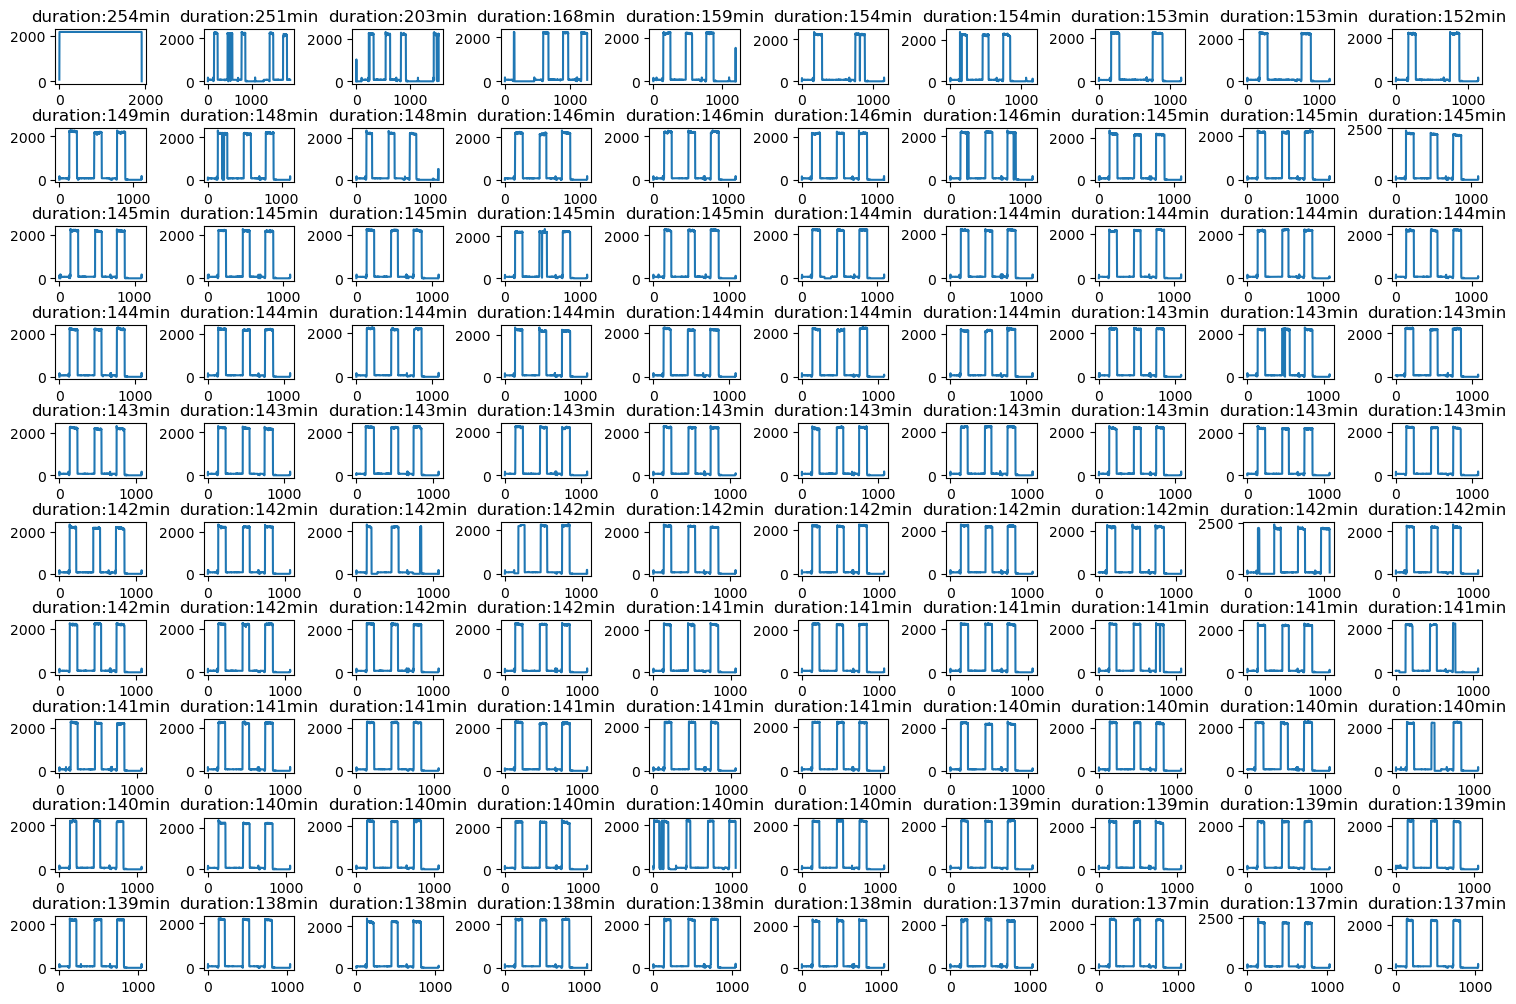

In [8]:
from matplotlib import pyplot as plt
house = 2
rows = 10
columns = 10
fig, axs = plt.subplots(rows, columns, figsize=(15,10))
fig.tight_layout()

plot_number = 0
for i in range(0,rows):
    for j in range(0,columns):
        axs[i,j].plot(pd.Series(appliance_activations[house]['activities_seq'][plot_number]))
        axs[i,j].set_title(f"duration:{int(appliance_activations[house]['duration_in_minutes'][plot_number])}min")
        plot_number+=1